In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotstyle

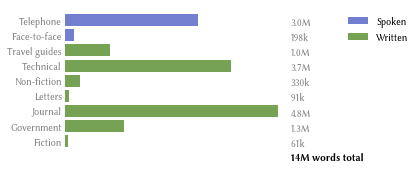

In [19]:
anc = pd.read_csv("../data/anc-balancing.tsv", sep="\t")
group = anc.groupby(["Domain", "Modality"]).sum()["Words"].reset_index()

spoken = group[group["Modality"] == "Spoken"]
written = group[group["Modality"] == "Written"]
total = group["Words"].sum()

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

plotstyle.setup("", "", "", yformat="{x:,.0f}", ax=ax)

bars3 = ax.barh(["Total"], [0])
bars2 = ax.barh(written["Domain"], written["Words"], color=plotstyle.palette[0], label="Written")
bars1 = ax.barh(spoken["Domain"], spoken["Words"], color=plotstyle.palette[1], label="Spoken")
ax.set_xticks([])
ax.set_yticklabels(pd.concat([ # why is this necessary, matplotlib??
    spoken["Domain"].iloc[::-1],
    written["Domain"].iloc[::-1],
    pd.Series("")]).iloc[::-1]
)
# <https://stackoverflow.com/a/46160465>
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=(1.25, 0.75), framealpha=1, frameon=False)
#plt.legend(handles=ax.get_children()[0:2], labels=list(group["Modality"].unique()))
#plt.tight_layout()

#fig.get_figwidth()
plotstyle.autolabel(bars1, fig=fig, ax=ax, color="gray")
plotstyle.autolabel(bars2, fig=fig, ax=ax, color="gray")
plotstyle.autolabel(bars3, fig=fig, ax=ax, suffix=" words total", widths=[total], weight="bold")

plt.savefig("../graphs/anc_balancing.svg", transparent=True, bbox_inches='tight')

In [3]:
pd.concat([written["Domain"], spoken["Domain"], pd.Series("")]).iloc[::-1]

0                 
7        Telephone
0     Face-to-face
8    Travel guides
6        Technical
5      Non-fiction
4          Letters
3          Journal
2       Government
1          Fiction
dtype: object

In [4]:
group

,Domain,Modality,Words
0,Face-to-face,Spoken,198295
1,Fiction,Written,61746
2,Government,Written,1329885
3,Journal,Written,4821192
4,Letters,Written,91318
5,Non-fiction,Written,330524
6,Technical,Written,3758994
7,Telephone,Spoken,3019477
8,Travel guides,Written,1012496
